In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [3]:
@njit
def Assign_Activity(eps1, eps2, gamma):
    rand = np.random.uniform(0, 1)
    power_rand = (eps1**(1-gamma) + (eps2**(1-gamma) - eps1**(1-gamma)) * rand)**(1/(1-gamma))
    return power_rand

@njit
def Calc_Act(A, frac, N):
    max = np.floor(float(N)*frac)
    act_ges = 0
    for i in range (len(A)):
        act_ges += A[i][1]

    act_frac = 0
    for i in range (max):
        act_frac += A[i][1]

    return act_frac/act_ges

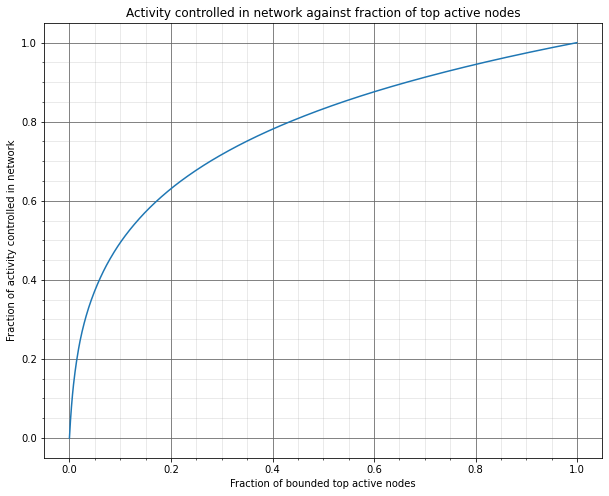

(array([  6.,   9.,  16.,  28.,  45.,  69., 105., 157., 230., 335.]),
 array([0.        , 0.099975  , 0.19995   , 0.299925  , 0.3999    ,
        0.49987499, 0.59984999, 0.69982499, 0.79979999, 0.89977499,
        0.99974999]),
 <BarContainer object of 10 artists>)

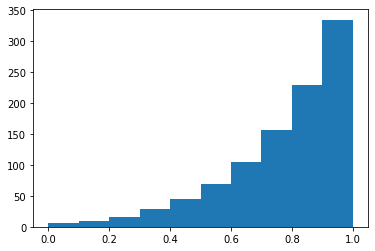

In [4]:
N = 10000

Acts = np.zeros((N,2))

for i in range (N):
    Acts[i][0] = Assign_Activity(0.01, 1.0, 2.1)
    Acts[i][1] = i

Acts_sort = np.flip(Acts[np.argsort(Acts[:,0])])

#print(Acts_sort)

fracs = np.arange(0, 1.0, 0.001)

perc = np.zeros(len(fracs))
for i in range (len(fracs)):
    perc[i] = Calc_Act(Acts_sort, fracs[i], N)

plt.figure(figsize=(10,8))
plt.title("Activity controlled in network against fraction of top active nodes")
plt.xlabel("Fraction of bounded top active nodes")
plt.ylabel("Fraction of activity controlled in network")
plt.plot(fracs, perc)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.25)
plt.show()

Text(0.5, 1.0, 'heaviside with threshhold at 0.4')

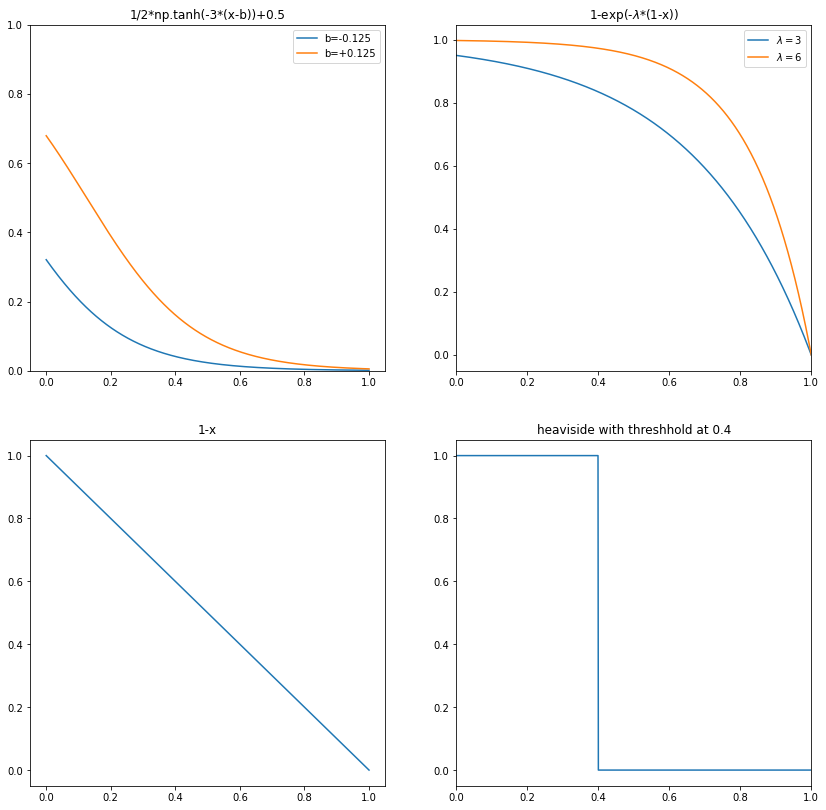

In [28]:
def heav(x):
    a = np.zeros(len(x))
    for i in range (len(x)):
        if x[i] <= 0.4:
            a[i] = 1
        else:
            a[i] = 0
    return a

x = np.linspace(0,1,1000)

fig, ax = plt.subplots(2,2, figsize=(14,14))
ax[0][0].plot(x, 1/2*np.tanh(-3*(x+0.125))+0.5, label="b=-0.125")
ax[0][0].plot(x, 1/2*np.tanh(-3*(x-0.125))+0.5, label="b=+0.125")
ax[0][0].set_ylim(0,1)
ax[0][0].set_title("1/2*np.tanh(-3*(x-b))+0.5")
ax[0][0].legend()

ax[0][1].plot(x, 1-np.exp(-3*(1-x)), label = r"$\lambda=3$")
ax[0][1].plot(x, 1-np.exp(-6*(1-x)), label = r"$\lambda=6$")
ax[0][1].set_xlim(0,1)
ax[0][1].legend()
ax[0][1].set_title(r"1-exp(-$\lambda$*(1-x))")

ax[1][0].plot(x, 1-x)
ax[1][0].set_title("1-x")

ax[1][1].set_xlim(0,1)
ax[1][1].plot(x, heav(x))
ax[1][1].set_xlim(0,1)
ax[1][1].set_title("heaviside with threshhold at 0.4")


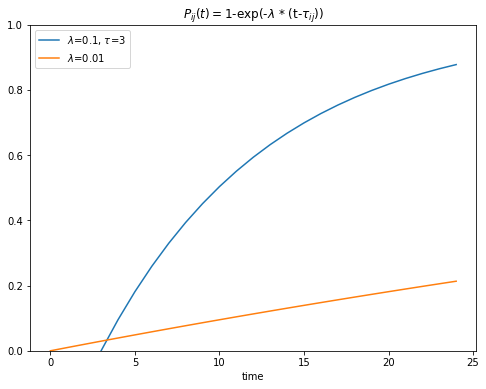

In [24]:
time = np.arange(0,25,1)
plt.figure(figsize=(8,6))
plt.title(r"$P_{ij}(t)=$1-exp(-$\lambda$ * (t-$\tau_{ij}$))")
plt.xlabel("time")
plt.plot(time, 1-np.exp(-0.1*(time-3)), label=r"$\lambda$=0.1, $\tau$=3")
plt.plot(time, 1-np.exp(-0.01*time), label=r"$\lambda$=0.01")
plt.ylim(0,1)
plt.legend()